In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Decision Tree classifier

In [2]:
from sklearn import datasets
from sklearn import tree

X,y = datasets.make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0)
clf = tree.DecisionTreeClassifier()

Plot prediction across grid

In [3]:
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

In [10]:
Xgrid, x1line,x2line = gen_sample_grid(limit=4)
clf.fit(X,y)
y_pred = clf.predict(Xgrid)
y_pred_grid = y_pred.reshape((len(x1line),len(x2line)))

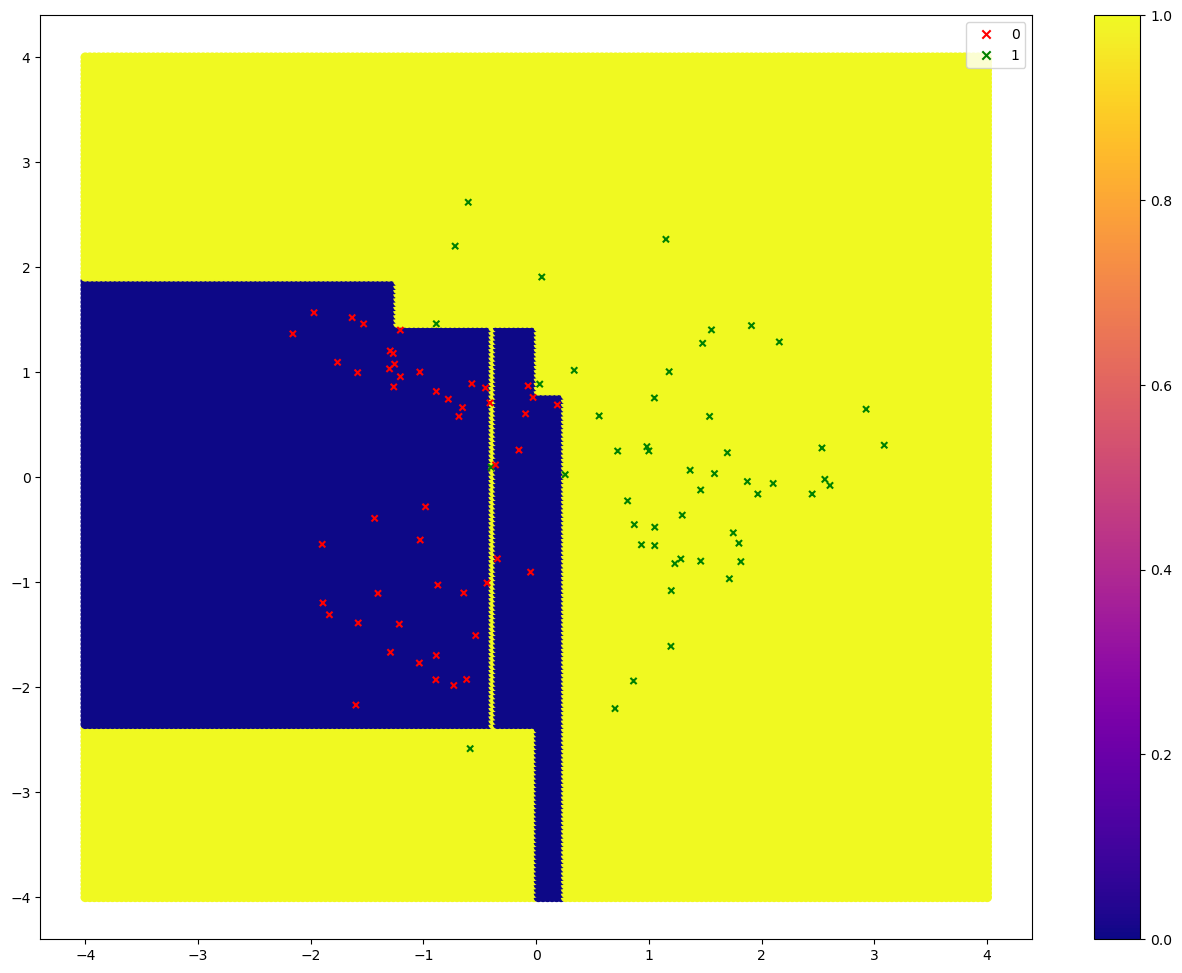

In [5]:
# Plot grid
fig, ax = plt.subplots()
fig.set_size_inches(16, 12, forward=True)
#plt.contourf(x1line,x2line,y_pred)

points = ax.scatter(Xgrid[:,0], Xgrid[:,1], c=y_pred, cmap="plasma")
fig.colorbar(points)

# Plot original data
colors=['red','green']
scatter = ax.scatter(X[:,0], X[:,1],c=y, 
    cmap=matplotlib.colors.ListedColormap(colors),marker='x',s=20)

classes = ['0','1']

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

- TODO: Make legend for above points' classes

## Random Forest Classifiers

In [11]:
from sklearn import ensemble
def plot_random_tree(Xgrid,y_pred_grid,X,y,depth):
    rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=depth)
    rf.fit(X,y)
    y_pred_grid = rf.predict_proba(Xgrid)
    # Plot grid
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 12, forward=True)
    #plt.contourf(x1line,x2line,y_pred)

    points = ax.scatter(Xgrid[:,0], Xgrid[:,1], c=y_pred_grid[:,0], cmap="plasma")
    fig.colorbar(points)

    # Plot original data
    colors=['red','green']
    ax.scatter(X[:,0], X[:,1],c=y, 
        cmap=matplotlib.colors.ListedColormap(colors), label=y,marker='x',s=20)

    classes = ['0','1']

    plt.legend(handles=scatter.legend_elements()[0], labels=classes)

    plt.title('Probability of belonging to class 0- depth = {}'.format(depth))


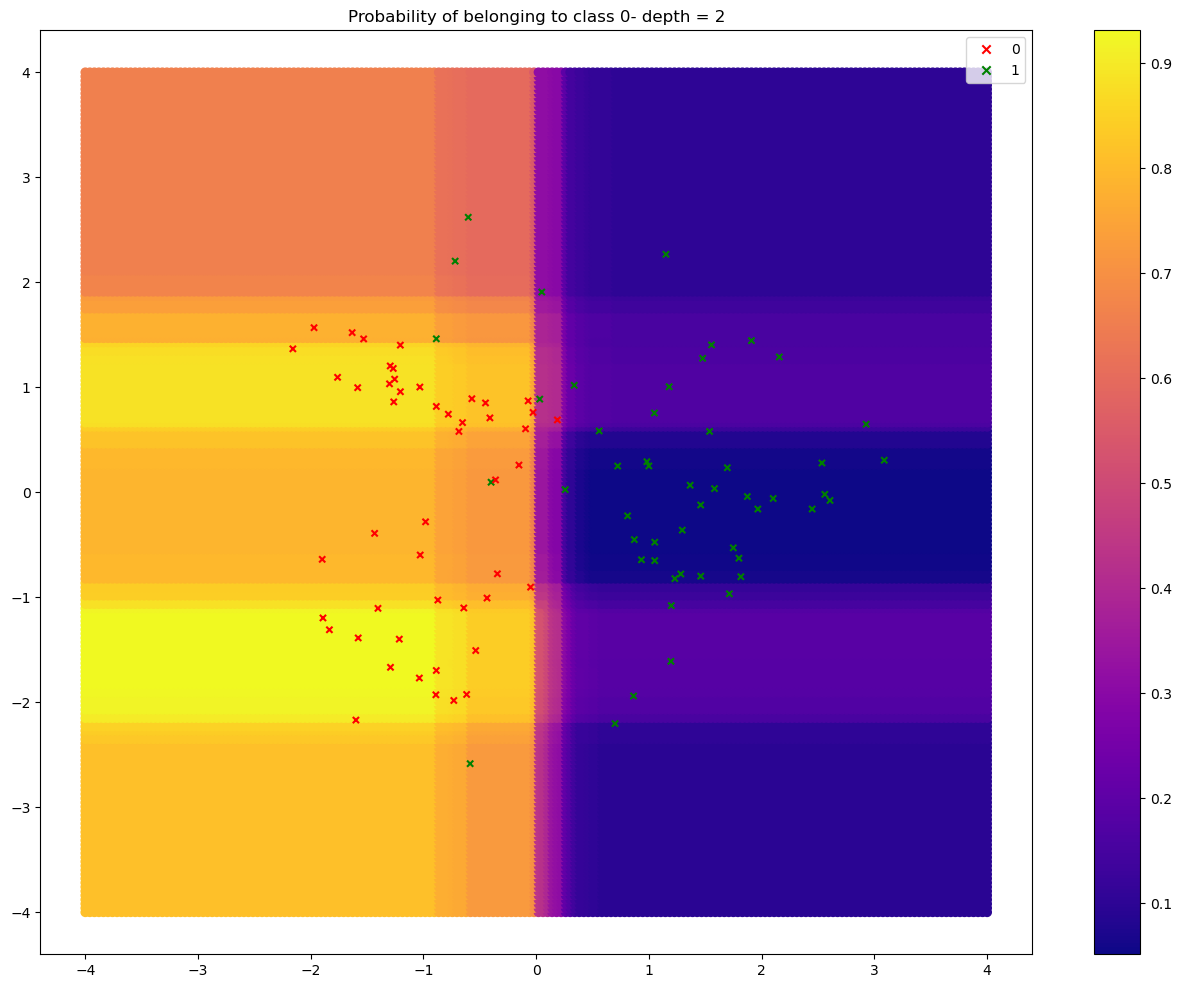

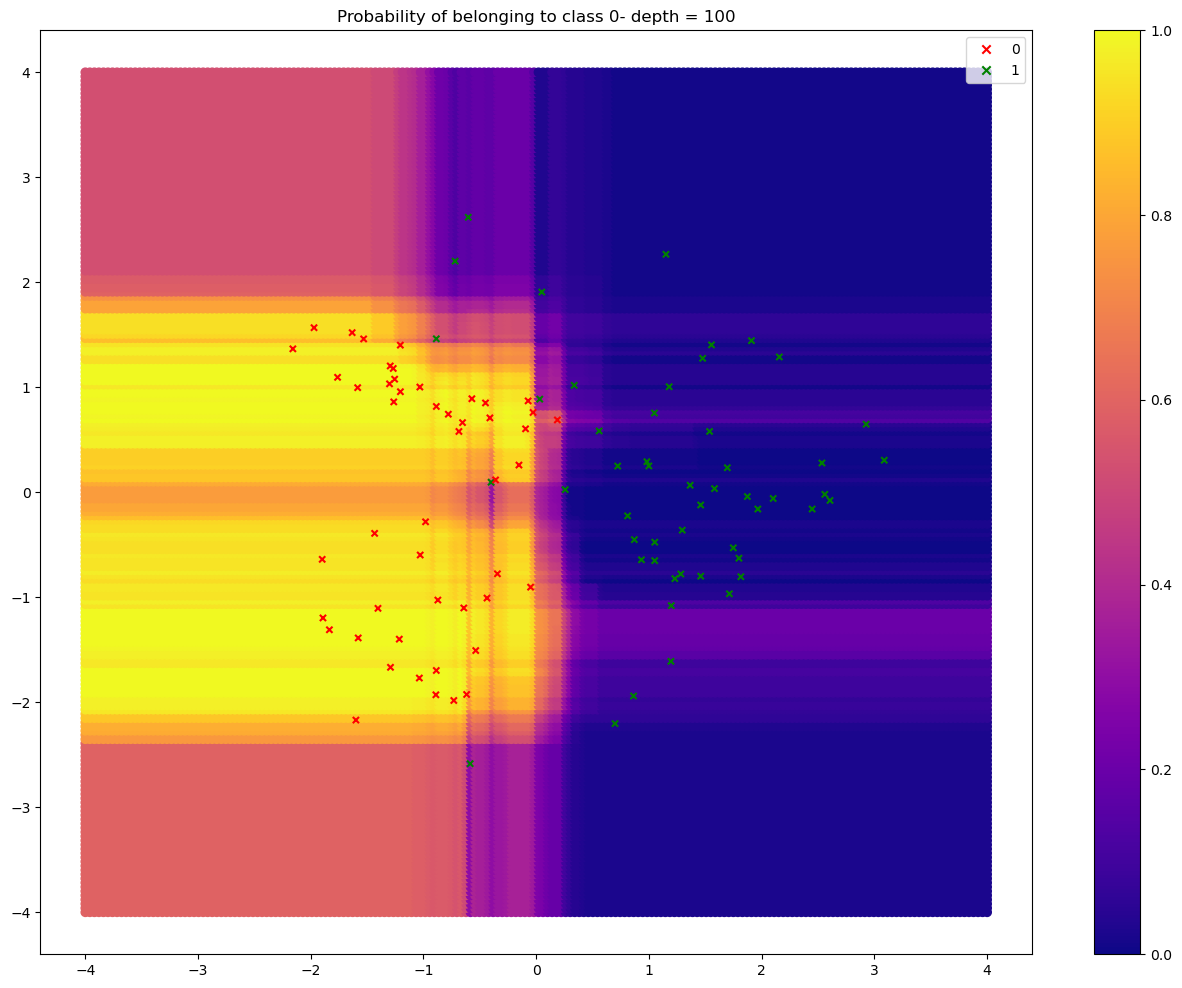

In [12]:
plot_random_tree(Xgrid,y_pred_grid,X,y,depth=2)
plot_random_tree(Xgrid,y_pred_grid,X,y,depth=100)

Only 100 datapoints so the difference isnt that apparent

# 3. Data processing

(-0.5, 499.5, 374.5, -0.5)

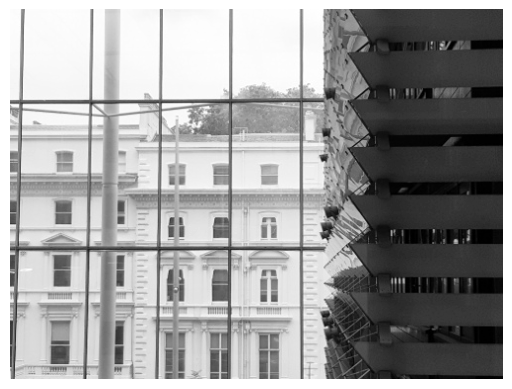

In [13]:
import matplotlib.image as mpimg
img = mpimg.imread('window.png')

# extract one channel (red)
imgBw = np.squeeze(img[:,:,0]) ## eliminates the third dimension of the array
npy,npx = imgBw.shape

plt.figure()
plt.imshow(imgBw,cmap=plt.cm.gray)
plt.axis('off')

### Fourier Processing

Plot 2d image spectrum of above 

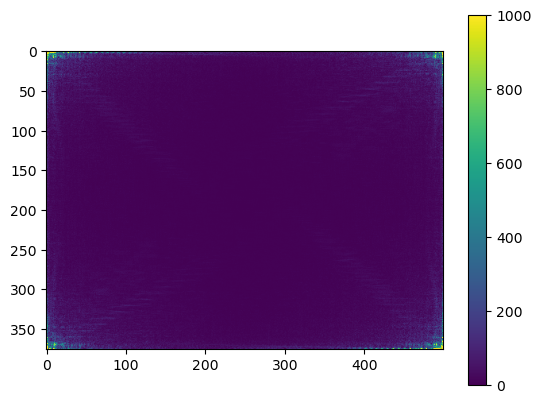

In [14]:
fim = np.fft.fft2(imgBw)

plt.figure()
plt.imshow(np.abs(fim))
plt.colorbar()
plt.clim(0,1000)

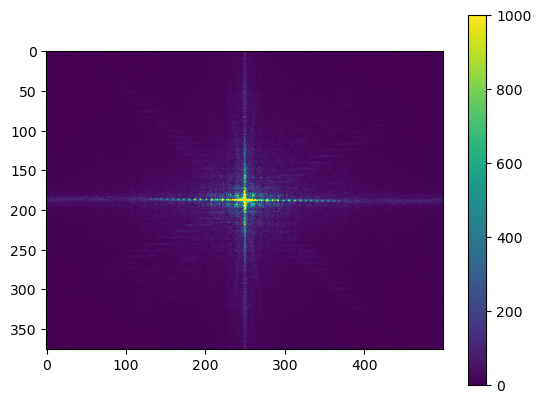

In [15]:
# Shift the (0,0 ) value to the center
y = np.fft.fftshift(fim)
plt.imshow(np.abs(y))
plt.colorbar()
plt.clim(0,1000)

(-0.5, 499.5, 374.5, -0.5)

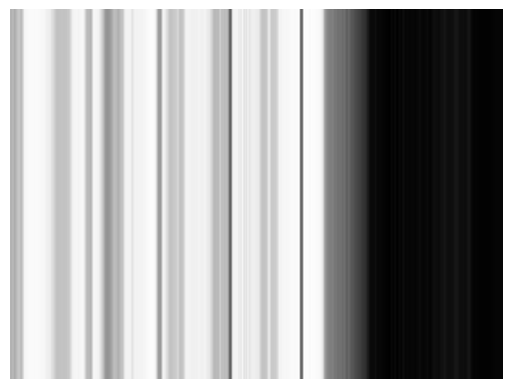

In [16]:
# set all values other than 60 points either side of (0,0) to zero
fim2 = fim.copy()
# set evt except first row to zero
fim2[1:npy,:] = 0
# set evt in first towexcept first and last 61 points to zero
fim2[0,61:npx-60]

# reverse fourier transform
img_ff = np.real(np.fft.ifft2(fim2))

plt.figure()
plt.imshow(img_ff,cmap=plt.cm.gray)
plt.axis('off')

Do the same but slice it int he y direction

(-0.5, 499.5, 374.5, -0.5)

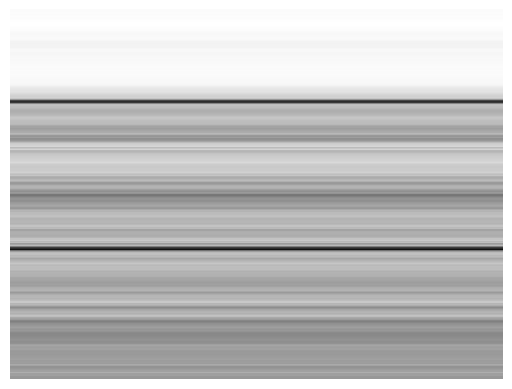

In [17]:
# set all values other than 60 points either side of (0,0) to zero
fim2 = fim.copy()
# set evt except first column to zero
fim2[:,1:npx] = 0
# set evt in first towexcept first and last 61 points to zero
fim2[0,61:npx-60]

# reverse fourier transform
img_ff = np.real(np.fft.ifft2(fim2))

plt.figure()
plt.imshow(img_ff,cmap=plt.cm.gray)
plt.axis('off')

In [168]:
fim.shape

(375, 500)

## 3.2 Edge Detection

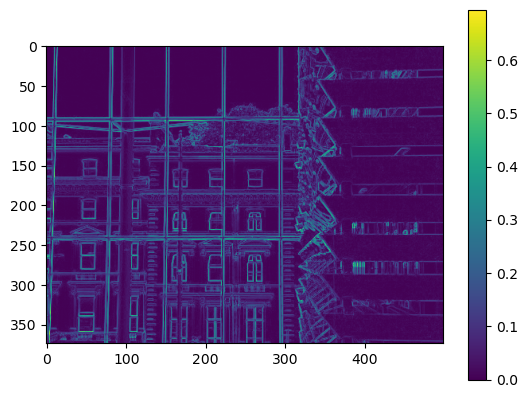

In [19]:
diffx = np.diff(imgBw,axis=1) #x axis
diffy = np.diff(imgBw,axis=0)

diffx = diffx[0:npy-1,:]
diffy = diffy[:,0:npx-1]

# combine diffs 
edgeIm = np.sqrt(diffx*diffx + diffy*diffy)

plt.imshow(edgeIm)
plt.colorbar()

### 4. Thresholding

 Apply thresholds to the edfe image and get binary map of which points are edges

(-0.5, 498.5, 373.5, -0.5)

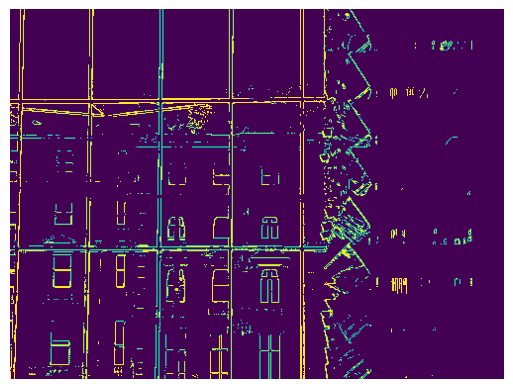

In [20]:
t = 0.2 # threshold
edgeTresh = (edgeIm > t).astype('int') # i.e. 0s or 1s
plt.imshow(edgeTresh)
plt.axis('off')